In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

D:\Anaconda3\envs\tflearn\lib\site-packages\pillow-4.0.0-py3.5-win-amd64.egg\PIL\Image.py:82: RuntimeWarning: The _imaging extension was built for another version of Python.
D:\Anaconda3\envs\tflearn\lib\site-packages\pillow-4.0.0-py3.5-win-amd64.egg\PIL\Image.py:82: RuntimeWarning: The _imaging extension was built for another version of Python.


In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [62]:
data_path = "train.csv"

In [63]:
data_raw = pd.read_csv("train.csv")
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [64]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 159571
Number of columns in data = 8


**Sample data:**

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [65]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [66]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  159571
Number of clean comments =  143346
Number of comments with labels = 16225


## discarding clean comments

In [68]:
data_new1 = data_raw[rowSums != 0]

In [69]:
data_new1.shape

(16225, 8)

### good to go from now

In [70]:
categories = list(data_new1.columns.values)
categories = categories[2:]
print(categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [71]:
counts = []
for category in categories:
    counts.append((category, data_new1[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


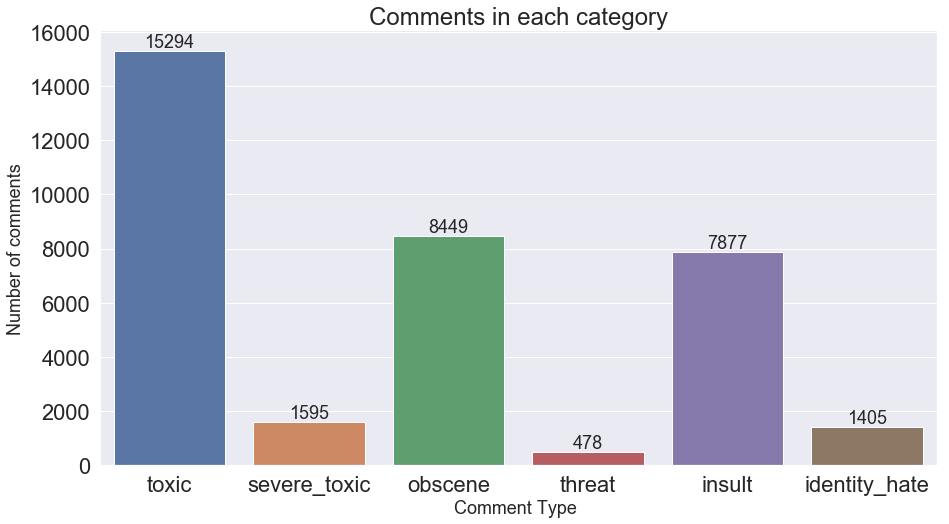

In [72]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_new1.iloc[:,2:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_new1.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

## Calculating number of comments having multiple labels

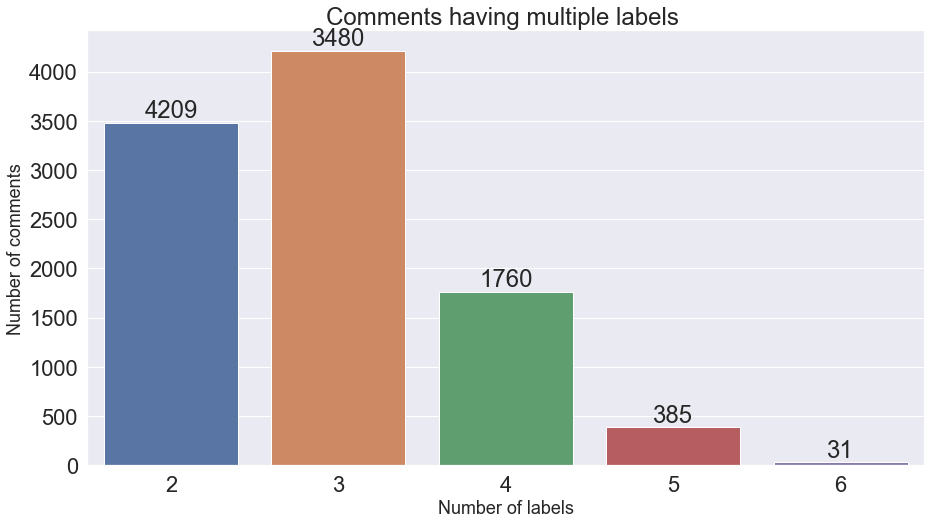

In [73]:
rowSums = data_new1.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [135]:
data_new = data_new1.loc[np.random.choice(data_new1.index, size=14000)]

In [136]:
data_new.shape

(14000, 8)

In [137]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [138]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [139]:
data_new['comment_text'] = data_new['comment_text'].str.lower()
data_new['comment_text'] = data_new['comment_text'].apply(cleanHtml)
data_new['comment_text'] = data_new['comment_text'].apply(cleanPunc)
data_new['comment_text'] = data_new['comment_text'].apply(keepAlpha)
data_new.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
56054,95ca847b5f2085e9,stay away please do not write on my user talk ...,1,0,0,0,0,0
23603,3e58569ec28d3822,no you utter retard hispanic means from spain ...,1,0,1,0,1,1
66715,b2859850ff51de3f,trouted you have been trouted for fuck you,1,1,1,0,1,0
121552,8a54b379b63d7ac0,wow dude you blocked me for stupid stuff i mad...,1,0,0,0,0,0
155381,bce597abd5c7434e,you are going to sit idly by and let these edi...,1,0,1,0,1,0


In [140]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data_new['comment_text'] = data_new['comment_text'].apply(removeStopWords)
data_new.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
56054,95ca847b5f2085e9,stay away please write user talk page f...,1,0,0,0,0,0
23603,3e58569ec28d3822,utter retard hispanic means spain mexicans ...,1,0,1,0,1,1
66715,b2859850ff51de3f,trouted trouted fuck you,1,1,1,0,1,0
121552,8a54b379b63d7ac0,wow dude blocked stupid stuff made edit ...,1,0,0,0,0,0
155381,bce597abd5c7434e,going sit idly let editors get away th...,1,0,1,0,1,0


In [141]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data_new['comment_text'] = data_new['comment_text'].apply(stemming)
data_new.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
56054,95ca847b5f2085e9,stay away pleas write user talk page find pede...,1,0,0,0,0,0
23603,3e58569ec28d3822,utter retard hispan mean spain mexican hispan ...,1,0,1,0,1,1
66715,b2859850ff51de3f,trout trout fuck you,1,1,1,0,1,0
121552,8a54b379b63d7ac0,wow dude block stupid stuff made edit get warn...,1,0,0,0,0,0
155381,bce597abd5c7434e,go sit idl let editor get away thing sure call...,1,0,1,0,1,0


In [142]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_new, random_state=42, test_size=0.05, shuffle=True)

print(train.shape)
print(test.shape)

(13300, 8)
(700, 8)


In [143]:
train_text = train['comment_text']
test_text = test['comment_text']

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [145]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','comment_text'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

## Multiple Binary Classifications - (Binary Relevance)

In [146]:
# %%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier_GNB = BinaryRelevance(GaussianNB())

# train
classifier_GNB.fit(x_train, y_train)

# predict
predictions = classifier_GNB.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.6714285714285714


## Classifier Chains

In [86]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [147]:
# %%time

# initialize classifier chains multi-label classifier
classifier_chain = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier_chain.fit(x_train, y_train)

# predict
predictions = classifier_chain.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.5571428571428572


## Label Powerset

In [88]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [148]:
# %%time

# initialize label powerset multi-label classifier
classifier_lblPwr = LabelPowerset(LogisticRegression())

# train
classifier_lblPwr.fit(x_train, y_train)

# predict
predictions = classifier_lblPwr.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.5414285714285715


## Adapted Algorithm

In [90]:
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [ ]:
# %%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))

## testing single example

* classifier_GNB
* classifier_chain
* classifier_lblPwr
* classifier_new

In [ ]:
X = vectorizer.transform(["But this is not the article about government position but about the reaction. Add positions to 2008 Kosovo declaration of independence or Foreign relations of Kosovo.
"])

In [ ]:
predicted_1 = classifier_GNB.predict(X)
predicted_2 = classifier_chain.predict(X)
predicted_3 = classifier_lblPwr.predict(X)
#predicted_4 = classifier_new.predict(X)

In [ ]:
print(predicted_1)
print(predicted_2)
print(predicted_3)
#print(predicted_4)